# Updraft Tracking

First, we're going to import all the libraries to perform the updraft tracking

In [1]:
import datetime
import shutil
from pathlib import Path
from six.moves import urllib

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import cmweather

Now, let's import tobac:

In [2]:
import tobac
print('using tobac version', str(tobac.__version__))

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


using tobac version 1.6.0


Getting the datasets we'll be using and opening them, as well as performing initial inspection of the data:

In [3]:
file = sorted(glob.glob("/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/*")) #Star at the end pulls everything that's in that directory
file

['/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/armrkhtxconv.20230401.071733.nc',
 '/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/armrkhtxconv.20230401.072813.nc',
 '/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/armrkhtxconv.20230401.074551.nc',
 '/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/armrkhtxconv.20230401.080334.nc',
 '/data/project/ARM_Summer_School_2025/radar/dda/multidop/stonybrook/armrkhtxconv.20230401.082641.nc']

In [4]:
ds = xr.open_mfdataset(file) #files[0] just for the first file. Add "mf" before "dataset()" to open multiple files
ds

<xarray.Dataset> Size: 129MB
Dimensions:                     (time: 5, z: 31, y: 161, x: 161)
Coordinates:
  * time                        (time) datetime64[ns] 40B 2023-04-01T07:17:33...
  * x                           (x) float32 644B -4e+04 -3.95e+04 ... 4e+04
  * y                           (y) float32 644B -4e+04 -3.95e+04 ... 4e+04
  * z                           (z) float32 124B 0.0 500.0 ... 1.45e+04 1.5e+04
Data variables: (12/13)
    origin_latitude             (time) float32 20B dask.array<chunksize=(1,), meta=np.ndarray>
    origin_longitude            (time) float32 20B dask.array<chunksize=(1,), meta=np.ndarray>
    origin_altitude             (time) float32 20B dask.array<chunksize=(1,), meta=np.ndarray>
    projection                  (time) int32 20B 1 1 1 1 1
    ProjectionCoordinateSystem  (time) int32 20B 1 1 1 1 1
    eastward_wind_component     (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    ...                          ...
    vertical_wind_component     (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    hydrometeor_fall_speed      (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    radar_coverage              (time, z, y, x) int32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    northward_wind_component    (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    radar_network_reflectivity  (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
    horizontal_wind_divergence  (time, z, y, x) float32 16MB dask.array<chunksize=(1, 31, 161, 161), meta=np.ndarray>
Attributes: (12/17)
    comment:                        
    process_version:                
    input_datastreams_description:  A string consisting of the datastream(s),...
    input_datastreams:              
    description:                    
    state:                          
    ...                             ...
    project:                        
    facility_id:                    
    references:                     
    institution:                    
    input_datastreams_num:          
    history:                        created by user moue on cumulus.das.bnl.g...

In [5]:
ds["x"]

<xarray.DataArray 'x' (x: 161)> Size: 644B
array([-40000., -39500., -39000., -38500., -38000., -37500., -37000., -36500.,
       -36000., -35500., -35000., -34500., -34000., -33500., -33000., -32500.,
       -32000., -31500., -31000., -30500., -30000., -29500., -29000., -28500.,
       -28000., -27500., -27000., -26500., -26000., -25500., -25000., -24500.,
       -24000., -23500., -23000., -22500., -22000., -21500., -21000., -20500.,
       -20000., -19500., -19000., -18500., -18000., -17500., -17000., -16500.,
       -16000., -15500., -15000., -14500., -14000., -13500., -13000., -12500.,
       -12000., -11500., -11000., -10500., -10000.,  -9500.,  -9000.,  -8500.,
        -8000.,  -7500.,  -7000.,  -6500.,  -6000.,  -5500.,  -5000.,  -4500.,
        -4000.,  -3500.,  -3000.,  -2500.,  -2000.,  -1500.,  -1000.,   -500.,
            0.,    500.,   1000.,   1500.,   2000.,   2500.,   3000.,   3500.,
         4000.,   4500.,   5000.,   5500.,   6000.,   6500.,   7000.,   7500.,
         8000.,   8500.,   9000.,   9500.,  10000.,  10500.,  11000.,  11500.,
        12000.,  12500.,  13000.,  13500.,  14000.,  14500.,  15000.,  15500.,
        16000.,  16500.,  17000.,  17500.,  18000.,  18500.,  19000.,  19500.,
        20000.,  20500.,  21000.,  21500.,  22000.,  22500.,  23000.,  23500.,
        24000.,  24500.,  25000.,  25500.,  26000.,  26500.,  27000.,  27500.,
        28000.,  28500.,  29000.,  29500.,  30000.,  30500.,  31000.,  31500.,
        32000.,  32500.,  33000.,  33500.,  34000.,  34500.,  35000.,  35500.,
        36000.,  36500.,  37000.,  37500.,  38000.,  38500.,  39000.,  39500.,
        40000.], dtype=float32)
Coordinates:
  * x        (x) float32 644B -4e+04 -3.95e+04 -3.9e+04 ... 3.95e+04 4e+04
Attributes:
    long_name:      X distance on the projection plane from the origin
    units:          meters
    standard_name:  projection_x_coordinate
    axis:           X

Taking a look at the vertical wind component

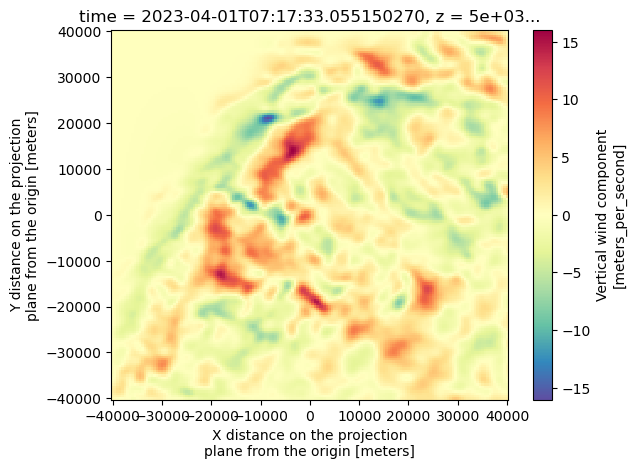

In [6]:
ds["vertical_wind_component"].isel(time=0).sel(z=5000).plot(cmap="Spectral_r")

## Subsetting data

Given that there are ripples in the w field above ~14 km, we opt to slice our data from 0 to 8 km.

In [7]:
ds = ds.sel(z=slice(0, 8_000))

In [8]:
vert_wind = ds["vertical_wind_component"]

In [9]:
vert_wind

<xarray.DataArray 'vertical_wind_component' (time: 5, z: 17, y: 161, x: 161)> Size: 9MB
dask.array<getitem, shape=(5, 17, 161, 161), dtype=float32, chunksize=(1, 17, 161, 161), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 40B 2023-04-01T07:17:33.055150270 ... 2023...
  * x        (x) float32 644B -4e+04 -3.95e+04 -3.9e+04 ... 3.95e+04 4e+04
  * y        (y) float32 644B -4e+04 -3.95e+04 -3.9e+04 ... 3.95e+04 4e+04
  * z        (z) float32 68B 0.0 500.0 1e+03 1.5e+03 ... 7e+03 7.5e+03 8e+03
Attributes:
    long_name:      Vertical wind component
    units:          meters_per_second
    standard_name:  vertical_wind_component

In [10]:
#vert_wind = vert_wind.drop_vars('z') #This is in case we need to drop the vertical axis

## Setting up tobac

In this section, we're going to work with our vertical velocity data without manipulating it. Our goal is to try to understand how to set up tobac.

In [11]:
#Defining the resolution of our data
dxy = 500
dt = 15*60

In [12]:
# Keyword arguments for feature detection step:
parameters_features={}
parameters_features['position_threshold']='weighted_diff'
parameters_features['sigma_threshold']=0.5
parameters_features['min_distance']=0
parameters_features['sigma_threshold']=1
parameters_features['threshold']=[3, 5, 10] #m/s
parameters_features['n_erosion_threshold']=0
parameters_features['n_min_threshold']=3

### Running tobac for first case

In [13]:
# Perform feature detection and save results:
print('start feature detection based on midlevel column maximum vertical velocity')
Features=tobac.feature_detection_multithreshold(vert_wind,dxy, vertical_cord='z', **parameters_features)
print('feature detection performed start saving features')
#Features.to_hdf(savedir / 'Features.h5', 'table')
print('features saved')

start feature detection based on midlevel column maximum vertical velocity
feature detection performed start saving features
features saved


In [14]:
Features

,frame,idx,vdim,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,x,y,z
0,0,5,3.178567,13.960780,118.510400,31,3,1,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,19255.200065,-33019.609933,1589.283528
1,0,6,4.024032,37.259938,146.620507,136,3,2,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,33310.253475,-21370.031179,2012.015803
2,0,8,2.982051,131.063534,65.587386,104,3,3,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,-7206.306852,25531.766965,1491.025319
3,0,9,2.474788,143.542458,150.493134,9,3,4,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,35246.566857,31771.228825,1237.394199
4,0,11,2.622932,152.110641,149.865784,61,3,5,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,34932.892130,36055.320376,1311.466204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,4,53,9.625281,21.568038,36.447995,366,10,242,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,-21776.002708,-29215.980947,4812.640732
242,4,54,10.229201,69.292079,34.934192,91,10,243,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,-22532.904021,-5353.960588,5114.600575
243,4,55,10.889364,156.468341,96.971728,6,10,244,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,8485.864216,38234.170428,5444.681774
244,4,56,14.606628,113.116791,48.438994,7,10,245,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,-15780.502909,16558.395601,7303.313831


In [15]:
# Keyword arguments for linking step:
parameters_linking={}
parameters_linking['method_linking']='predict'
parameters_linking['adaptive_stop']=0.5
parameters_linking['adaptive_step']=0.95
parameters_linking['extrapolate']=0
parameters_linking['order']=1
parameters_linking['subnetwork_size']=5
parameters_linking['memory']=0
parameters_linking['time_cell_min']=dt
parameters_linking['method_linking']='predict'
parameters_linking['v_max']=15

In [16]:
# Perform linking and save results:
Track=tobac.linking_trackpy(Features,vert_wind,dt=dt,dxy=dxy,**parameters_linking)
#Track.to_hdf(savedir / 'Track.h5', 'table')

Frame 4: 37 trajectories present.


In [17]:
Track

,frame,idx,vdim,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,x,y,z,cell,time_cell
0,0,5,3.178567,13.960780,118.510400,31,3,1,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,19255.200065,-33019.609933,1589.283528,-1,NaT
1,0,6,4.024032,37.259938,146.620507,136,3,2,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,33310.253475,-21370.031179,2012.015803,-1,NaT
2,0,8,2.982051,131.063534,65.587386,104,3,3,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,-7206.306852,25531.766965,1491.025319,-1,NaT
3,0,9,2.474788,143.542458,150.493134,9,3,4,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,35246.566857,31771.228825,1237.394199,-1,NaT
4,0,11,2.622932,152.110641,149.865784,61,3,5,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,34932.892130,36055.320376,1311.466204,-1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,4,53,9.625281,21.568038,36.447995,366,10,242,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,-21776.002708,-29215.980947,4812.640732,-1,NaT
242,4,54,10.229201,69.292079,34.934192,91,10,243,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,-22532.904021,-5353.960588,5114.600575,16,0 days 01:09:08.002762794
243,4,55,10.889364,156.468341,96.971728,6,10,244,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,8485.864216,38234.170428,5444.681774,-1,NaT
244,4,56,14.606628,113.116791,48.438994,7,10,245,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,-15780.502909,16558.395601,7303.313831,116,0 days 00:23:06.995227575


In [18]:
Track.groupby("cell")["time_cell"].max()

cell
-1                           NaT
 6     0 days 00:10:40.000366449
 8     0 days 01:09:08.002762794
 9     0 days 00:46:01.007535219
 10    0 days 01:09:08.002762794
                  ...           
 114   0 days 00:23:06.995227575
 116   0 days 00:23:06.995227575
 117   0 days 00:23:06.995227575
 119   0 days 00:23:06.995227575
 120   0 days 00:23:06.995227575
Name: time_cell, Length: 65, dtype: timedelta64[ns]

In [19]:
Track = Track[Track["cell"] != -1]

Text(0, 0.5, 'counts')

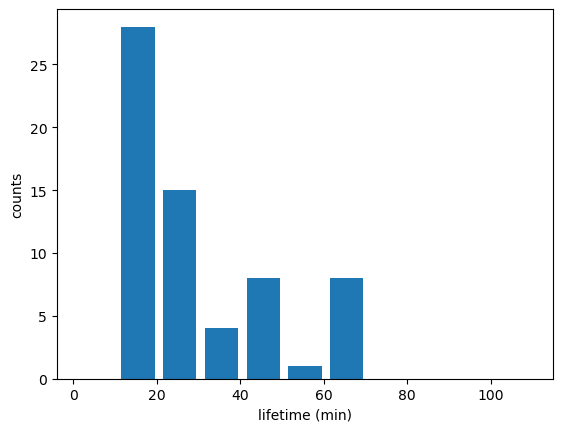

In [20]:
# Updraft lifetimes of tracked cells:
fig_lifetime,ax_lifetime=plt.subplots()
tobac.plot_lifetime_histogram_bar(Track,axes=ax_lifetime,bin_edges=np.arange(0,120,10),density=False,width_bar=8)
ax_lifetime.set_xlabel('lifetime (min)')
ax_lifetime.set_ylabel('counts')

In [21]:
#Segmentation
parameters_segmentation_TWC={}
parameters_segmentation_TWC['method']='watershed'
parameters_segmentation_TWC['threshold']=1 

In [22]:
print('Start segmentation based on total water content')
Mask_TWC, Features_TWC = tobac.segmentation_3D(Features, vert_wind, dxy, **parameters_segmentation_TWC)
print('segmentation TWC performed, start saving results to files')
#Mask_TWC.to_netcdf(savedir / 'Mask_Segmentation_TWC.nc', encoding={"segmentation_mask":{"zlib":True, "complevel":4}})
#Features_TWC.to_hdf(savedir / 'Features_TWC.h5','table')
print('segmentation TWC performed and saved')

Start segmentation based on total water content
segmentation TWC performed, start saving results to files
segmentation TWC performed and saved


In [23]:
Track[Track["frame"]==0]["x"]

5     37940.312830
7    -31421.728172
8    -26278.325532
9     15833.892314
10   -32562.664238
12   -38061.670324
13    -3780.940510
14   -26917.609968
15   -32710.479608
18    31992.417937
19    -7277.339006
21     3756.861052
23    -6125.608090
25   -17317.440601
28    12638.542416
32     4162.764458
36    22530.218180
38   -12989.836650
39    17789.949453
42    25044.362168
44    14926.079326
45   -29107.676279
48    19875.333476
49    37386.993259
50   -27141.171290
52    22373.637336
53     7420.194082
54    26641.250985
56    29257.064484
57   -32650.673805
58    -5729.776139
59   -12347.473716
60   -19576.947832
62    -9287.634917
63    -3091.907193
65    23617.779517
66   -18458.099888
Name: x, dtype: float64

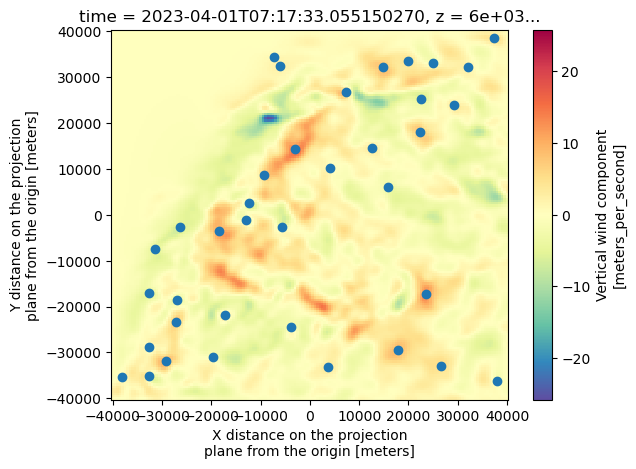

In [24]:
ds["vertical_wind_component"].isel(time=0).sel(z=6000).plot(cmap="Spectral_r")
plt.scatter(Track[Track["frame"]==0]["x"], Track[Track["frame"]==0]["y"])

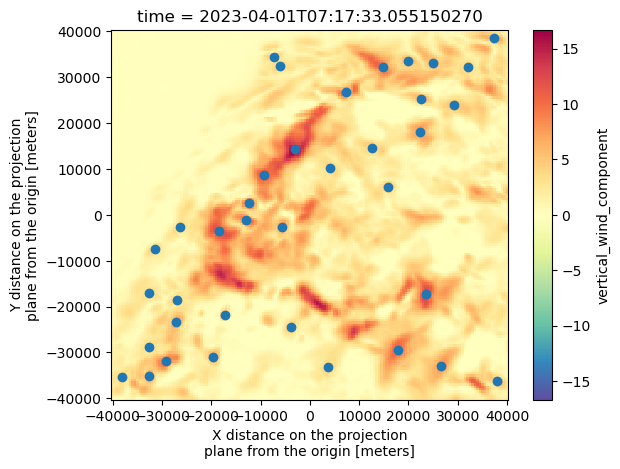

In [25]:
ds["vertical_wind_component"].isel(time=0).max(dim="z").plot(cmap="Spectral_r") #We're going to try to get the wmax. For that, we do .max along the z direction!
plt.scatter(Track[Track["frame"]==0]["x"], Track[Track["frame"]==0]["y"])

### Running a new feature detection by taking the maximum w field first

In [26]:
w_wind_max = ds["vertical_wind_component"].max(dim="z")

In [27]:
w_wind_max

<xarray.DataArray 'vertical_wind_component' (time: 5, y: 161, x: 161)> Size: 518kB
dask.array<_nanmax_skip-aggregate, shape=(5, 161, 161), dtype=float32, chunksize=(1, 161, 161), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 40B 2023-04-01T07:17:33.055150270 ... 2023...
  * x        (x) float32 644B -4e+04 -3.95e+04 -3.9e+04 ... 3.95e+04 4e+04
  * y        (y) float32 644B -4e+04 -3.95e+04 -3.9e+04 ... 3.95e+04 4e+04

In [28]:
# Keyword arguments for feature detection step:
parameters_features={}
parameters_features['position_threshold']='weighted_diff'
parameters_features['sigma_threshold']=0.5
parameters_features['min_distance']=0
parameters_features['sigma_threshold']=1
parameters_features['threshold']=[3, 5, 10] #m/s
parameters_features['n_erosion_threshold']=0
parameters_features['n_min_threshold']=3

In [29]:
# Perform feature detection and save results:
print('start feature detection based on midlevel column maximum vertical velocity')
Features=tobac.feature_detection_multithreshold(w_wind_max,dxy, vertical_cord='z', **parameters_features)
print('feature detection performed start saving features')
print('features saved')

start feature detection based on midlevel column maximum vertical velocity
feature detection performed start saving features
features saved


In [30]:
Features

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,x,y
0,0,1,2.294555,28.378831,34,3,1,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,-25810.584295,-38852.722536
1,0,3,0.093277,139.199270,7,3,2,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,29599.634976,-39953.361428
2,0,5,4.134388,2.222051,6,3,3,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,-38888.974631,-37932.805759
3,0,6,13.855187,87.774421,39,3,4,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,3887.210415,-33072.406378
4,0,8,24.972321,34.296526,20,3,5,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,-22851.737014,-27513.839641
...,...,...,...,...,...,...,...,...,...,...,...
223,4,52,104.225256,113.943732,8,10,224,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,16971.866141,12112.628001
224,4,53,113.015275,48.353934,11,10,225,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,-15823.033044,16507.637459
225,4,54,134.636988,84.367833,12,10,226,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,2183.916357,27318.493974
226,4,55,147.845426,119.680200,42,10,227,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,19840.100155,33922.712916


In [31]:
# Keyword arguments for linking step:
parameters_linking={}
parameters_linking['method_linking']='predict'
parameters_linking['adaptive_stop']=0.5
parameters_linking['adaptive_step']=0.95
parameters_linking['extrapolate']=0
parameters_linking['order']=1
parameters_linking['subnetwork_size']=5
parameters_linking['memory']=0
parameters_linking['time_cell_min']=dt
parameters_linking['method_linking']='predict'
parameters_linking['v_max']=15

In [32]:
# Perform linking and save results:
Track_w_wind_max = tobac.linking_trackpy(Features,w_wind_max,dt=dt,dxy=dxy,**parameters_linking)
#Track.to_hdf(savedir / 'Track.h5', 'table')

Frame 4: 37 trajectories present.


In [33]:
Track_w_wind_max

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,x,y,cell,time_cell
0,0,1,2.294555,28.378831,34,3,1,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,-25810.584295,-38852.722536,-1,NaT
1,0,3,0.093277,139.199270,7,3,2,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,29599.634976,-39953.361428,2,0 days 00:00:00
2,0,5,4.134388,2.222051,6,3,3,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,-38888.974631,-37932.805759,3,0 days 00:00:00
3,0,6,13.855187,87.774421,39,3,4,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,3887.210415,-33072.406378,4,0 days 00:00:00
4,0,8,24.972321,34.296526,20,3,5,2023-04-01 07:17:33.055150270,2023-04-01 07:17:33,-22851.737014,-27513.839641,-1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,4,52,104.225256,113.943732,8,10,224,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,16971.866141,12112.628001,42,0 days 01:09:08.002762794
224,4,53,113.015275,48.353934,11,10,225,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,-15823.033044,16507.637459,75,0 days 00:40:50.002231836
225,4,54,134.636988,84.367833,12,10,226,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,2183.916357,27318.493974,104,0 days 00:23:06.995227575
226,4,55,147.845426,119.680200,42,10,227,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,19840.100155,33922.712916,45,0 days 01:09:08.002762794


In [34]:
Track_w_wind_max.groupby("cell")["time_cell"].max()

cell
-1                           NaT
 2     0 days 01:09:08.002762794
 3     0 days 00:28:18.000530958
 4     0 days 00:28:18.000530958
 8     0 days 01:09:08.002762794
 9     0 days 01:09:08.002762794
 10    0 days 01:09:08.002762794
 11    0 days 00:10:40.000366449
 14    0 days 01:09:08.002762794
 19    0 days 00:10:40.000366449
 22    0 days 00:28:18.000530958
 23    0 days 00:28:18.000530958
 24    0 days 00:10:40.000366449
 29    0 days 01:09:08.002762794
 30    0 days 00:28:18.000530958
 32    0 days 00:10:40.000366449
 33    0 days 00:28:18.000530958
 35    0 days 00:10:40.000366449
 40    0 days 00:10:40.000366449
 42    0 days 01:09:08.002762794
 45    0 days 01:09:08.002762794
 47    0 days 00:10:40.000366449
 48    0 days 00:28:18.000530958
 49    0 days 00:46:01.007535219
 50    0 days 01:09:08.002762794
 52    0 days 01:09:08.002762794
 55    0 days 00:10:40.000366449
 57    0 days 01:09:08.002762794
 58    0 days 00:10:40.000366449
 59    0 days 01:09:08.002762794
 60  

In [35]:
Track_w_wind_max = Track_w_wind_max[Track_w_wind_max["cell"] != -1]

Text(0, 0.5, 'counts')

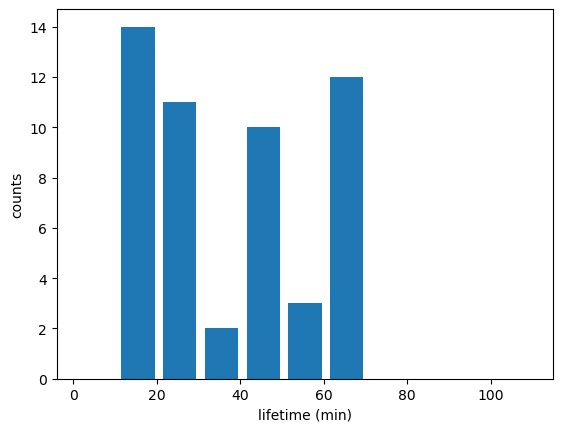

In [36]:
# Updraft lifetimes of tracked cells:
fig_lifetime,ax_lifetime=plt.subplots()
tobac.plot_lifetime_histogram_bar(Track_w_wind_max,axes=ax_lifetime,bin_edges=np.arange(0,120,10),density=False,width_bar=8)
ax_lifetime.set_xlabel('lifetime (min)')
ax_lifetime.set_ylabel('counts')

In [37]:
#Segmentation
parameters_segmentation_TWC={}
parameters_segmentation_TWC['method']='watershed'
parameters_segmentation_TWC['threshold']=1 

In [38]:
print('Start segmentation based on total water content')
Mask_TWC, Features_TWC = tobac.segmentation_3D(Features, w_wind_max, dxy, **parameters_segmentation_TWC)
print('segmentation TWC performed, start saving results to files')
#Mask_TWC.to_netcdf(savedir / 'Mask_Segmentation_TWC.nc', encoding={"segmentation_mask":{"zlib":True, "complevel":4}})
#Features_TWC.to_hdf(savedir / 'Features_TWC.h5','table')
print('segmentation TWC performed and saved')

Start segmentation based on total water content
segmentation TWC performed, start saving results to files
segmentation TWC performed and saved


In [39]:
Track_w_wind_max[Track_w_wind_max["frame"]==0]["x"]


1     29599.634976
2    -38888.974631
3      3887.210415
7    -17266.658546
8    -36712.569711
9    -32816.936701
10    32244.689285
13   -26352.315936
18     4227.495128
21    28293.928498
22    -6937.500092
23      181.802757
28    33766.555632
29   -29544.800736
31    17798.734025
32   -19532.618183
34    33244.641395
39    22295.156665
41    22548.944155
44     7863.344224
46    15078.502408
47    32452.991398
48    19960.347453
49    28223.303629
51    37140.800796
54    23564.548715
56   -10336.796840
57   -18269.711623
58    -3292.726903
Name: x, dtype: float64

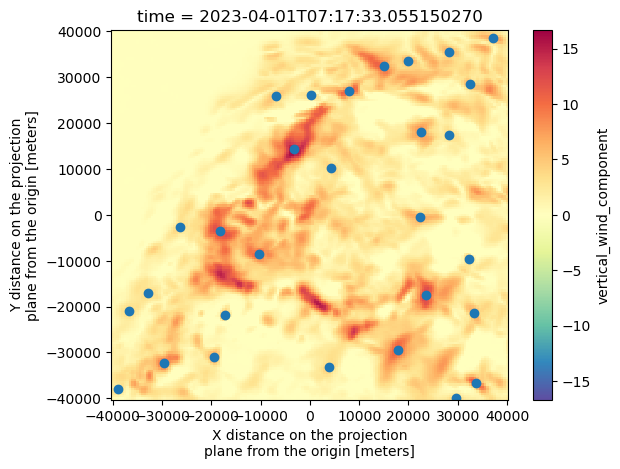

In [40]:
ds["vertical_wind_component"].isel(time=0).max(dim="z").plot(cmap="Spectral_r") #We're going to try to get the wmax. For that, we do .max along the z direction!
plt.scatter(Track_w_wind_max[Track_w_wind_max["frame"]==0]["x"], Track_w_wind_max[Track_w_wind_max["frame"]==0]["y"])

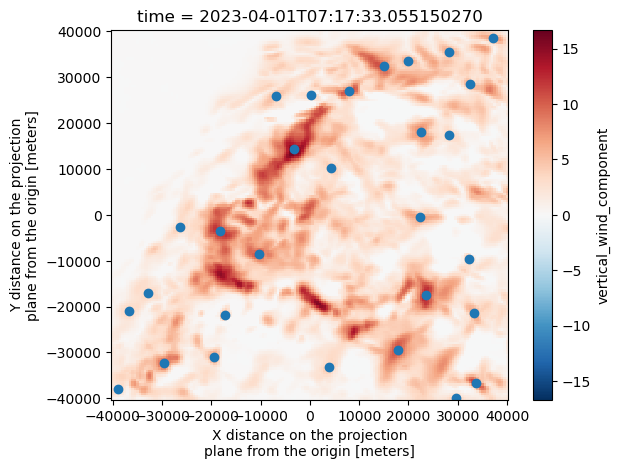

In [41]:
w_wind_max.isel(time=0).plot()
plt.scatter(Track_w_wind_max[Track_w_wind_max["frame"]==0]["x"], Track_w_wind_max[Track_w_wind_max["frame"]==0]["y"])

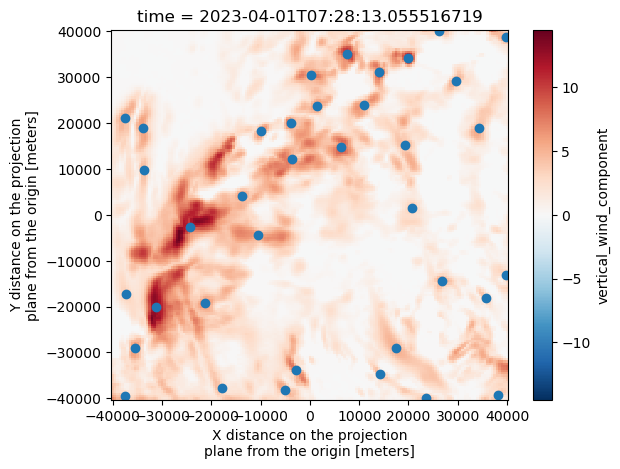

In [42]:
w_wind_max.isel(time=1).plot()
plt.scatter(Track_w_wind_max[Track_w_wind_max["frame"]==1]["x"], Track_w_wind_max[Track_w_wind_max["frame"]==1]["y"])

## Working on animating the detected features

### Animation for w_max_tracking

In [46]:
#Setting up a for loop to plot more figures

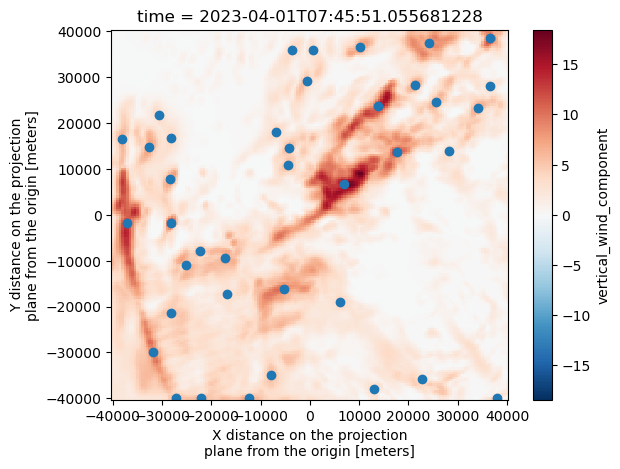

In [45]:

w_wind_max.isel(time=2).plot()
plt.scatter(Track_w_wind_max[Track_w_wind_max["frame"]==2]["x"], Track_w_wind_max[Track_w_wind_max["frame"]==2]["y"])

In [82]:
single_time = Track_w_wind_max.time.unique()[2]
single_time

Timestamp('2023-04-01 07:45:51.055681228')

In [83]:
Track_w_wind_max.loc[(Track_w_wind_max.time == single_time) & (Track_w_wind_max.threshold_value == 10)]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,x,y,cell,time_cell
136,2,59,76.598185,5.611446,133,10,137,2023-04-01 07:45:51.055681228,2023-04-01 07:45:51,-37194.276993,-1700.907492,9,0 days 00:28:18.000530958
137,2,60,93.302666,93.721315,261,10,138,2023-04-01 07:45:51.055681228,2023-04-01 07:45:51,6860.657504,6651.333210,83,0 days 00:00:00
138,2,62,107.458479,115.279206,10,10,139,2023-04-01 07:45:51.055681228,2023-04-01 07:45:51,17639.602953,13729.239539,42,0 days 00:28:18.000530958
139,2,63,127.514418,107.688945,89,10,140,2023-04-01 07:45:51.055681228,2023-04-01 07:45:51,13844.472289,23757.208831,45,0 days 00:28:18.000530958


In [109]:
def subset_column(ds, time, x, y):
    return ds.sel(time=time, x=x, y=y, method='nearest')

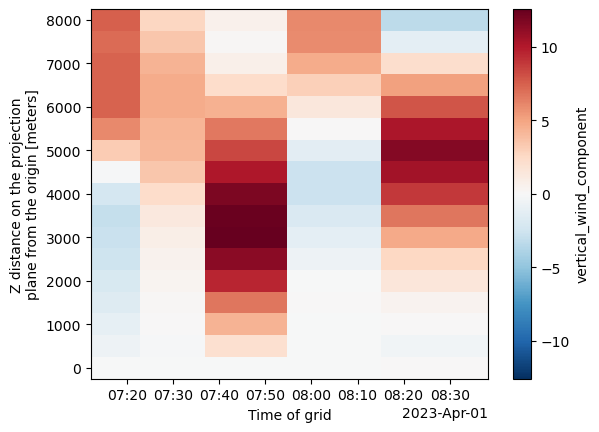

In [137]:
single_cell = Track_w_wind_max.loc[Track_w_wind_max.cell == 42]
ds_list = []
for time in single_cell.time.values:
    row = single_cell.loc[single_cell.time == time]
    ds_list.append(subset_column(ds, time=row.time.values, x=row.x.values, y=row.y.values))

single_cell_ds = xr.concat(ds_list, dim='time')
single_cell_ds
single_cell_ds.vertical_wind_component.max(["y", "x"]).plot(y='z')

<Axes: title={'center': 'time = 2023-04-01T07:45:51.055681228, z = 3e+03...'}, xlabel='x', ylabel='y'>

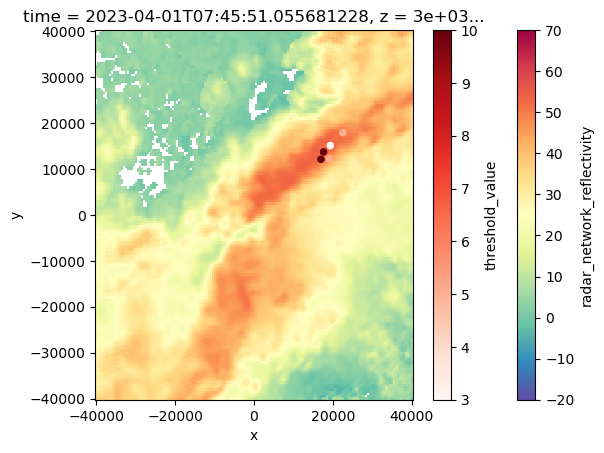

In [106]:
ax = plt.subplot(111)
#ds.sel(z=5000).isel(time=2).vertical_wind_component.plot()
ds.sel(z=3000).isel(time=2).radar_network_reflectivity.plot(cmap="Spectral_r", vmin=-20, vmax=70)
Track_w_wind_max.loc[Track_w_wind_max.cell == 42].plot.scatter(x="x", y='y', ax=ax, c="threshold_value", cmap="Reds")

In [139]:
Track_w_wind_max.loc[Track_w_wind_max.cell == 83]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,x,y,cell,time_cell
137,2,60,93.302666,93.721315,261,10,138,2023-04-01 07:45:51.055681228,2023-04-01 07:45:51,6860.657504,6651.333210,83,0 days 00:00:00
168,3,43,99.607033,97.321020,227,5,169,2023-04-01 08:03:34.062685489,2023-04-01 08:03:34,8660.510201,9803.516653,83,0 days 00:17:43.007004261
213,4,35,93.549780,99.602151,19,5,214,2023-04-01 08:26:41.057913064,2023-04-01 08:26:41,9801.075636,6774.890043,83,0 days 00:40:50.002231836


<Axes: title={'center': 'time = 2023-04-01T07:45:51.055681228, z = 3e+03...'}, xlabel='x', ylabel='y'>

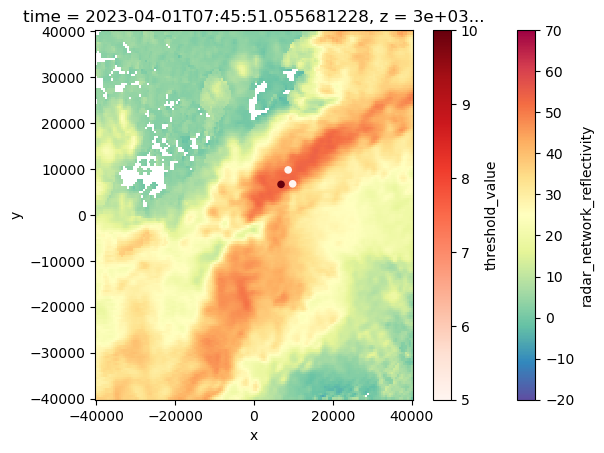

In [140]:
ax = plt.subplot(111)
#ds.sel(z=5000).isel(time=2).vertical_wind_component.plot()
ds.sel(z=3000).isel(time=2).radar_network_reflectivity.plot(cmap="Spectral_r", vmin=-20, vmax=70)
Track_w_wind_max.loc[Track_w_wind_max.cell == 83].plot.scatter(x="x", y='y', ax=ax, c="threshold_value", cmap="Reds")

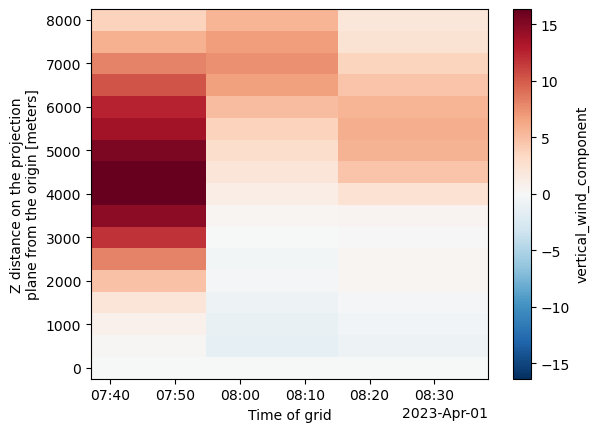

In [141]:
single_cell = Track_w_wind_max.loc[Track_w_wind_max.cell == 83]
ds_list = []
for time in single_cell.time.values:
    row = single_cell.loc[single_cell.time == time]
    ds_list.append(subset_column(ds, time=row.time.values, x=row.x.values, y=row.y.values))

single_cell_ds = xr.concat(ds_list, dim='time')
single_cell_ds
single_cell_ds.vertical_wind_component.max(["y", "x"]).plot(y='z')

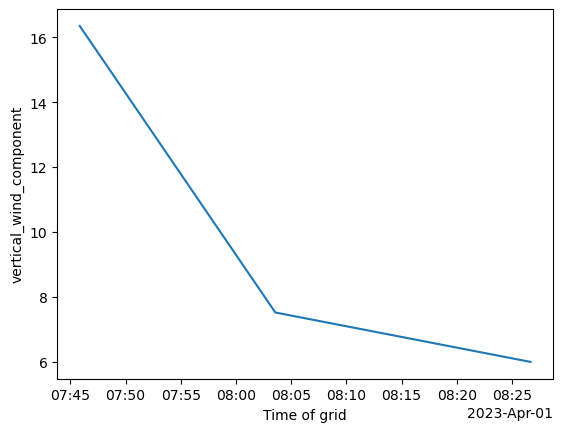

In [144]:
single_cell_ds.vertical_wind_component.max(dim=["x", "y", "z"]).plot()

## Running some other tests

<Axes: title={'center': 'time = 2023-04-01T07:45:51.055681228, z = 3e+03...'}, xlabel='x', ylabel='y'>

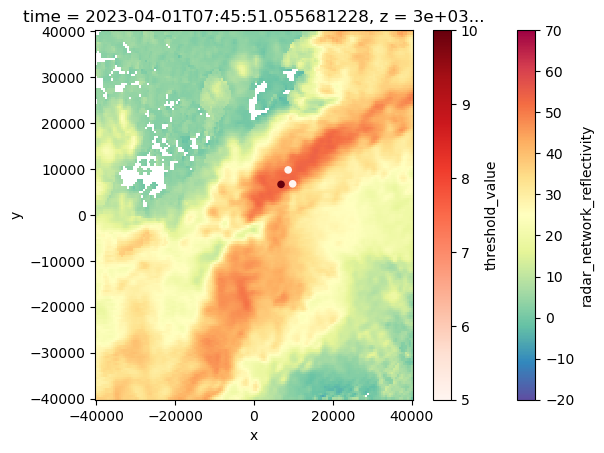

In [145]:
ax = plt.subplot(111)
#ds.sel(z=5000).isel(time=2).vertical_wind_component.plot()
ds.sel(z=3000).isel(time=2).radar_network_reflectivity.plot(cmap="Spectral_r", vmin=-20, vmax=70)
Track_w_wind_max.loc[Track_w_wind_max.cell == 83].plot.scatter(x="x", y='y', ax=ax, c="threshold_value", cmap="Reds")